# Cyclistic Trip Data EDA<br>
<pre>
   <b>Company:</b>  Cyclistic
<b>Department:</b>  Marketing
   <b>Manager:</b>  Lily Moreno
   <b>Analyst:</b>  Malcomb C. Brown
      <b>Date:</b>  Nov. 29, 2022
   <b>Version:</b>  V01
</pre>

In [1]:
# Importing required libraries
import os                       # for interacting with the operating system
import pandas as pd             # for working with tabular data
import matplotlib.pyplot as plt # for basic plotting
import seaborn as sns           # for advanced statistical plotting
import calendar                 # for weekdays and months ordering lists

%matplotlib inline

# Set the style of the plots
plt.style.use("seaborn")


## Load merged trip dataset

In [2]:
# Get csv file path
dir_path = os.getcwd() + "\\Prepared_data\\"
file = os.listdir(dir_path)[0]
file_path = dir_path + file

In [3]:
# Load the dataset and inspect the first 10 rows
trip_data = pd.read_csv(file_path)
trip_data.head(10)

,ride_id,bike_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,customer_type,ride_length,day_of_week,month_of_year
0,7C00A93E10556E47,electric_bike,2021-11-27 13:27:38,2021-11-27 13:46:38,NaN,NaN,NaN,NaN,41.930000,-87.720000,41.96,-87.73,casual,19.00,Saturday,November
1,90854840DFD508BA,electric_bike,2021-11-27 13:38:25,2021-11-27 13:56:10,NaN,NaN,NaN,NaN,41.960000,-87.700000,41.92,-87.70,casual,17.75,Saturday,November
2,0A7D10CDD144061C,electric_bike,2021-11-26 22:03:34,2021-11-26 22:05:56,NaN,NaN,NaN,NaN,41.960000,-87.700000,41.96,-87.70,casual,2.37,Friday,November
3,2F3BE33085BCFF02,electric_bike,2021-11-27 09:56:49,2021-11-27 10:01:50,NaN,NaN,NaN,NaN,41.940000,-87.790000,41.93,-87.79,casual,5.02,Saturday,November
4,D67B4781A19928D4,electric_bike,2021-11-26 19:09:28,2021-11-26 19:30:41,NaN,NaN,NaN,NaN,41.900000,-87.630000,41.88,-87.62,casual,21.22,Friday,November
5,02F85C2C3C5F7D46,electric_bike,2021-11-26 18:34:07,2021-11-26 18:52:49,Michigan Ave & Oak St,13042,NaN,NaN,41.900864,-87.623794,41.90,-87.63,casual,18.70,Friday,November
6,EF780B807EF7835A,electric_bike,2021-11-27 13:31:12,2021-11-27 13:37:12,NaN,NaN,NaN,NaN,41.810000,-87.600000,41.80,-87.60,casual,6.00,Saturday,November
7,17069CC749126036,electric_bike,2021-11-27 14:33:56,2021-11-27 14:34:38,NaN,NaN,NaN,NaN,41.950000,-87.660000,41.95,-87.66,casual,0.70,Saturday,November
8,93FC4662BDC5C061,electric_bike,2021-11-27 09:14:33,2021-11-27 09:19:36,NaN,NaN,NaN,NaN,41.800000,-87.600000,41.79,-87.60,casual,5.05,Saturday,November
9,B06B064398A360B3,electric_bike,2021-11-27 16:13:31,2021-11-27 16:22:50,NaN,NaN,NaN,NaN,41.780000,-87.600000,41.80,-87.59,casual,9.32,Saturday,November


## Transform data

In [4]:
# Remove unnecessary geographical columns
# Missing latitude and longitude for 940,010 records
# Requires further analysis
columns = trip_data.columns[4:12].to_list()
trip_data.drop(columns=columns, inplace=True)
trip_data.head()

,ride_id,bike_type,started_at,ended_at,customer_type,ride_length,day_of_week,month_of_year
0,7C00A93E10556E47,electric_bike,2021-11-27 13:27:38,2021-11-27 13:46:38,casual,19.00,Saturday,November
1,90854840DFD508BA,electric_bike,2021-11-27 13:38:25,2021-11-27 13:56:10,casual,17.75,Saturday,November
2,0A7D10CDD144061C,electric_bike,2021-11-26 22:03:34,2021-11-26 22:05:56,casual,2.37,Friday,November
3,2F3BE33085BCFF02,electric_bike,2021-11-27 09:56:49,2021-11-27 10:01:50,casual,5.02,Saturday,November
4,D67B4781A19928D4,electric_bike,2021-11-26 19:09:28,2021-11-26 19:30:41,casual,21.22,Friday,November


In [5]:
# Transform the 'started_at' and 'ended_at' to datetime objects
trip_data["started_at"] = pd.to_datetime(trip_data["started_at"])
trip_data["ended_at"] = pd.to_datetime(trip_data["ended_at"])

In [6]:
# Convert all data types to the optimal type supporting 'pd.NA'
trip_data = trip_data.convert_dtypes()
trip_data

,ride_id,bike_type,started_at,ended_at,customer_type,ride_length,day_of_week,month_of_year
0,7C00A93E10556E47,electric_bike,2021-11-27 13:27:38,2021-11-27 13:46:38,casual,19.0,Saturday,November
1,90854840DFD508BA,electric_bike,2021-11-27 13:38:25,2021-11-27 13:56:10,casual,17.75,Saturday,November
2,0A7D10CDD144061C,electric_bike,2021-11-26 22:03:34,2021-11-26 22:05:56,casual,2.37,Friday,November
3,2F3BE33085BCFF02,electric_bike,2021-11-27 09:56:49,2021-11-27 10:01:50,casual,5.02,Saturday,November
4,D67B4781A19928D4,electric_bike,2021-11-26 19:09:28,2021-11-26 19:30:41,casual,21.22,Friday,November
...,...,...,...,...,...,...,...,...
5751076,BC3BFA659C9AB6F1,classic_bike,2022-10-30 01:41:29,2022-10-30 01:57:16,casual,15.78,Sunday,October
5751077,ACD65450291CF95F,classic_bike,2022-10-30 01:41:54,2022-10-30 01:57:09,casual,15.25,Sunday,October
5751078,4AAC03D1438E97CA,classic_bike,2022-10-15 09:34:11,2022-10-15 10:03:21,casual,29.17,Saturday,October
5751079,8E6F3F29785E5D40,classic_bike,2022-10-09 10:21:34,2022-10-09 10:43:45,member,22.18,Sunday,October


## Inspect the data

In [7]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5751081 entries, 0 to 5751080
Data columns (total 8 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ride_id        string        
 1   bike_type      string        
 2   started_at     datetime64[ns]
 3   ended_at       datetime64[ns]
 4   customer_type  string        
 5   ride_length    Float64       
 6   day_of_week    string        
 7   month_of_year  string        
dtypes: Float64(1), datetime64[ns](2), string(5)
memory usage: 356.5 MB


In [8]:
trip_data.describe(include = "all", datetime_is_numeric = True)

,ride_id,bike_type,started_at,ended_at,customer_type,ride_length,day_of_week,month_of_year
count,5751081,5751081,5751081,5751081,5751081,5.751081e+06,5751081,5751081
unique,5751081,3,NaN,NaN,2,NaN,7,12
top,7C00A93E10556E47,electric_bike,NaN,NaN,member,NaN,Saturday,July
freq,1,2933116,NaN,NaN,3399950,NaN,938919,822922
mean,NaN,NaN,2022-06-13 23:11:56.670712832,2022-06-13 23:31:23.383047680,NaN,1.944520e+01,NaN,NaN
min,NaN,NaN,2021-11-01 00:00:14,2021-11-01 00:04:06,NaN,2.000000e-02,NaN,NaN
25%,NaN,NaN,2022-04-27 16:49:10,2022-04-27 16:59:47,NaN,5.850000e+00,NaN,NaN
50%,NaN,NaN,2022-06-30 18:34:10,2022-06-30 18:52:19,NaN,1.035000e+01,NaN,NaN
75%,NaN,NaN,2022-08-24 19:51:28,2022-08-24 20:09:24,NaN,1.858000e+01,NaN,NaN
max,NaN,NaN,2022-10-31 23:59:33,2022-11-07 04:53:58,NaN,4.138725e+04,NaN,NaN


<b>There are no duplicates present in the dataset as the most frequent 'ride_id' appears only once.</b>

<pre>
<h3>Busiest Day:</h3>
<b>Saturday</b> <i>(939,671 rides)</i>
<h3>Busiest Month:</h3>
<b>July</b> <i>(823,488 rides)</i>
</pre>

## Visualize the data

### Usage by Type of Bike

In [11]:
# Bike usage totals
bike_usage = trip_data["bike_type"].value_counts().to_frame()
bike_usage

,bike_type
electric_bike,2933116
classic_bike,2635895
docked_bike,182070


In [12]:
# Bike usage in percent
trip_data["bike_type"].value_counts(normalize=True).to_frame()

,bike_type
electric_bike,0.510011
classic_bike,0.45833
docked_bike,0.031658


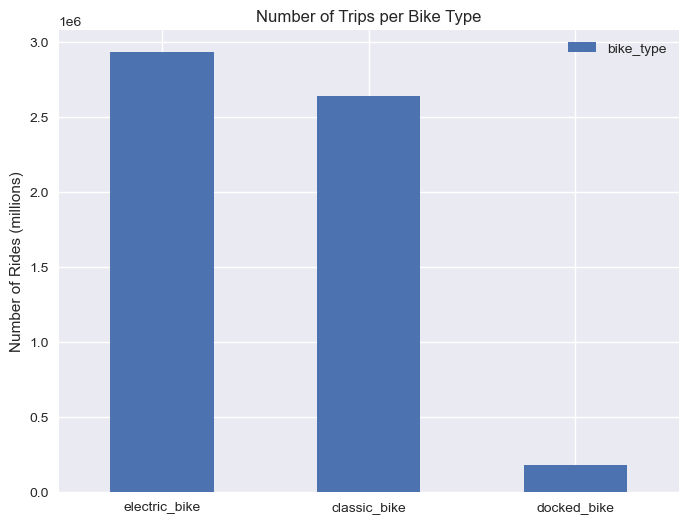

In [21]:
bike_usage.plot(kind="bar", figsize=(8, 6),
                title="Number of Trips per Bike Type",
                ylabel= "Number of Rides (millions)",
                xlabel="",
                rot=0)
plt.show()

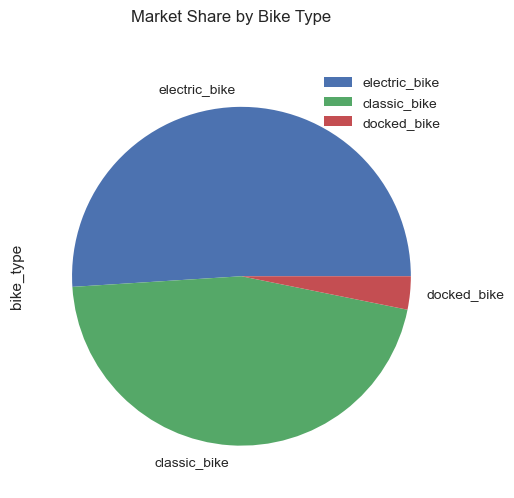

In [15]:
bike_usage.plot(kind='pie', title="Market Share by Bike Type", subplots=True, )
plt.show()

Electric bikes are slightly more popular than classic bikes.<br>
Electric bikes are used more than 51% of the time.<br>
Docked bikes make up only 3% of all bike usage.

### Customer Type Market Share

In [16]:
# Total number of customers by type
customer_market_share = trip_data["customer_type"].value_counts().to_frame()
customer_market_share

,customer_type
member,3399950
casual,2351131


In [17]:
# Percentage of market share by customer type
customer_market_share = trip_data["customer_type"].value_counts(normalize = True).to_frame()
customer_market_share

,customer_type
member,0.591185
casual,0.408815


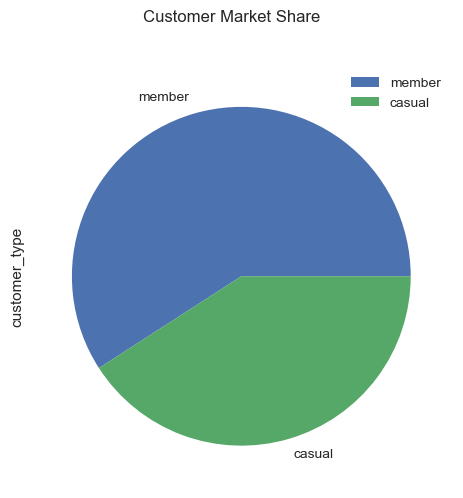

In [18]:
customer_market_share.plot(kind='pie', title="Customer Market Share", subplots=True, )
plt.show()

Members make up 59% of our customer base.

### Ride by type of Customer and type of Bike

In [19]:
# Total number of rides by 'customer_type' and 'bike_type'
cust_bike_type = trip_data.groupby(["bike_type", "customer_type"])["customer_type"].count().unstack().fillna(value = 0)
cust_bike_type

customer_type,casual,member
bike_type,,
classic_bike,896716.0,1739179.0
docked_bike,182070.0,0.0
electric_bike,1272345.0,1660771.0


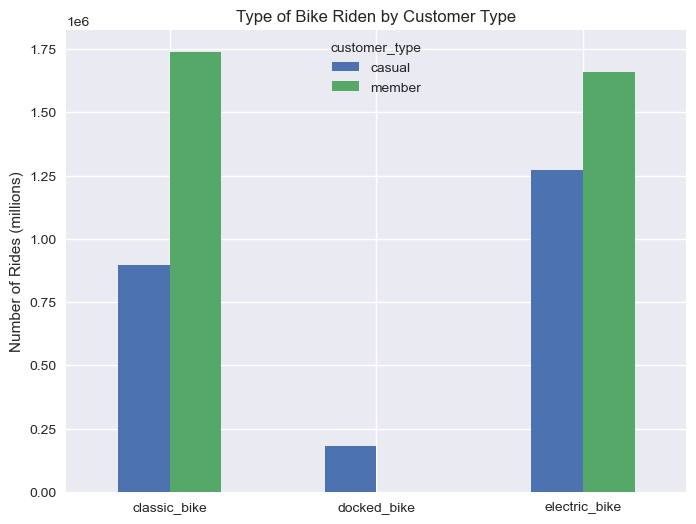

In [20]:
cust_bike_type.plot(kind="bar", figsize=(8, 6),
                    title="Type of Bike Riden by Customer Type",
                    ylabel="Number of Rides (millions)",
                    xlabel="", rot=0)
plt.show()

Members do not use docked bikes.<br>
Member slightly prefer classic bikes over electric ones.<br>
Casual riders use all three of our bike options.<br>
Casual riders prefer electric bikes.

In [22]:
# Compare 'customer_type' to 'ride_length'
trip_data.groupby("customer_type")["ride_length"].agg(["min", "max", "mean", "median"])

,min,max,mean,median
customer_type,,,,
casual,0.02,41387.25,29.176766,13.17
member,0.02,1559.9,12.715642,8.83


Casual riders have a higher average ride length, more than double that of annual members.<br>
Ride length data is skewed to the right for both annual members and casual riders.<br>
Outliers are causing the average ride time to appear higher than what most customers will experience.

# Plot by Day of the Week

#### Get a list of the days of the week and months of the year<br>
_Note: Lists are used to order the index for plotting_

In [23]:
# Using the 'date_name' attribute from the calender library
weekdays = calendar.day_name[:]
weekdays

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [24]:
# Using the 'month_name' attribute from the calender library
months = calendar.month_name[1:]
months

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

In [25]:
# Rearrange the list to represent the previous year  
for n in range(2):
    months.insert(0, months[-1])
    months.pop()

months

['November',
 'December',
 'January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October']

### Rides per Day

In [26]:
# Calculate the number of rides per day by customer type
customers_per_day = trip_data.groupby(["day_of_week", "customer_type"])["day_of_week"].count().unstack()

# Sort the index
customers_per_day = customers_per_day.reindex(weekdays)

In [27]:
customers_per_day

customer_type,casual,member
day_of_week,,
Monday,284736,489289
Tuesday,264186,523286
Wednesday,275187,529242
Thursday,306693,532246
Friday,338679,476341
Saturday,484878,454041
Sunday,396772,395505


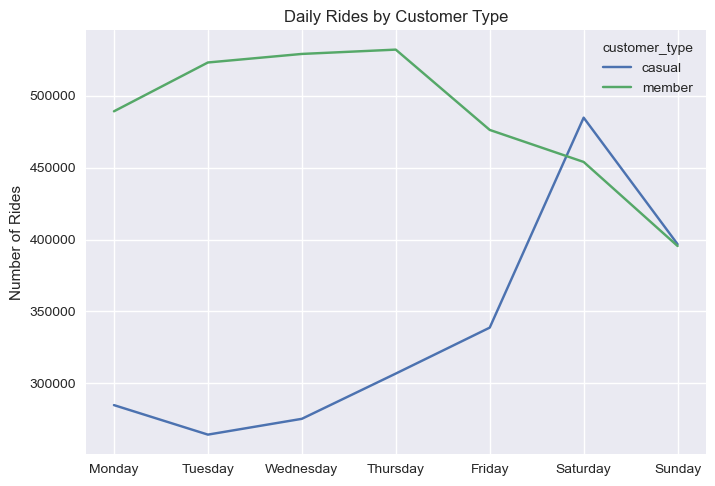

In [28]:
customers_per_day.plot(title="Daily Rides by Customer Type", ylabel="Number of Rides", xlabel="")
plt.show()

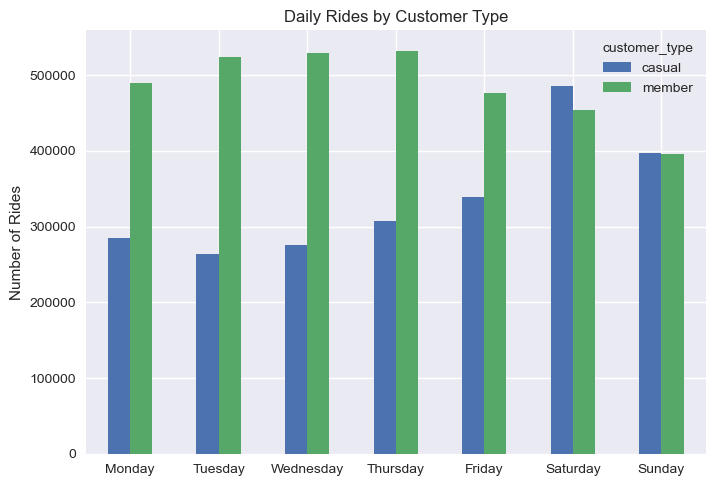

In [29]:
customers_per_day.plot(kind="bar", title="Daily Rides by Customer Type", ylabel="Number of Rides", xlabel="", rot=0)
plt.show()

Members mainly ride during the work week. <i>Weekend drop off is not major</i><br>
Casual riders prefer riding on the weekend.<br>
Are there any local events taking place on the weekend?<br>
Do members use our bikes to commute to work? Casual riders?<br>
Can we survey our riders to discover how and why they utilize our service?

### Customer average Ride Length

In [30]:
# Calculate the average 'ride_length' by 'customer_type'
trip_data.groupby("customer_type")["ride_length"].agg("mean").to_frame()

,ride_length
customer_type,
casual,29.176766
member,12.715642


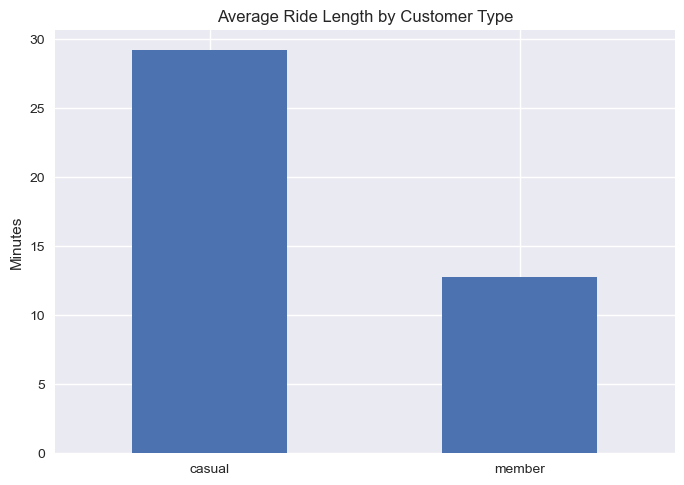

In [31]:
trip_data.groupby("customer_type")["ride_length"].agg("mean").plot(kind="bar",
                                                                   title="Average Ride Length by Customer Type",
                                                                   ylabel="Minutes",
                                                                   xlabel="",
                                                                   rot=0,
                                                                   fontsize=10)
plt.show()

### Customer Avg. Daily Ride Length

In [32]:
# Calculate the average 'ride_length' per 'day_of_week' by 'customer_type'
avg_day_ride_length = trip_data.groupby(["customer_type", "day_of_week"])["ride_length"].agg("mean").unstack().T

In [33]:
# Sort the index
avg_day_ride_length = avg_day_ride_length.reindex(weekdays)

In [34]:
avg_day_ride_length

customer_type,casual,member
day_of_week,,
Monday,29.289823,12.29615
Tuesday,26.024857,12.135994
Wednesday,24.912662,12.080658
Thursday,25.475902,12.248937
Friday,27.914798,12.477703
Saturday,32.639492,14.183793
Sunday,33.857936,14.080421


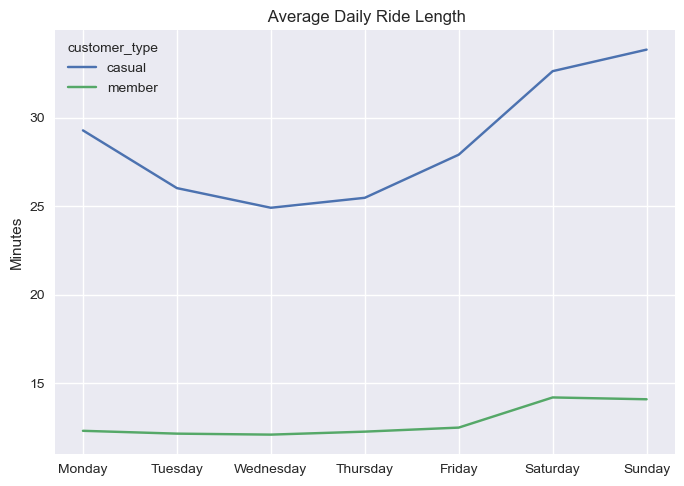

In [35]:
avg_day_ride_length.plot(title=" Average Daily Ride Length", ylabel="Minutes", xlabel="")
plt.show()

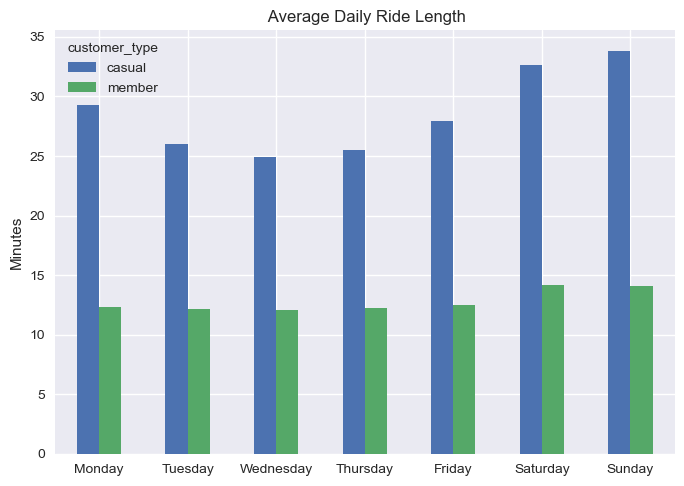

In [36]:
avg_day_ride_length.plot(kind="bar", title=" Average Daily Ride Length", ylabel="Minutes", xlabel="", rot=0)
plt.show()

Both annual members and casual riders ride longer on the weekend.<br>
The increase for members is not significant.

### Rides per Month

In [37]:
# Calculate the number of rides per day by customer type
customers_per_m = trip_data.groupby(["month_of_year", "customer_type"])["month_of_year"].count().unstack()

# Sort the index
customers_per_m = customers_per_m.reindex(months)
customers_per_m

customer_type,casual,member
month_of_year,,
November,106811,252831
December,69674,177634
January,18505,85178
February,21390,94116
March,89794,193979
April,126290,244616
May,280199,354139
June,368771,399873
July,405767,417155


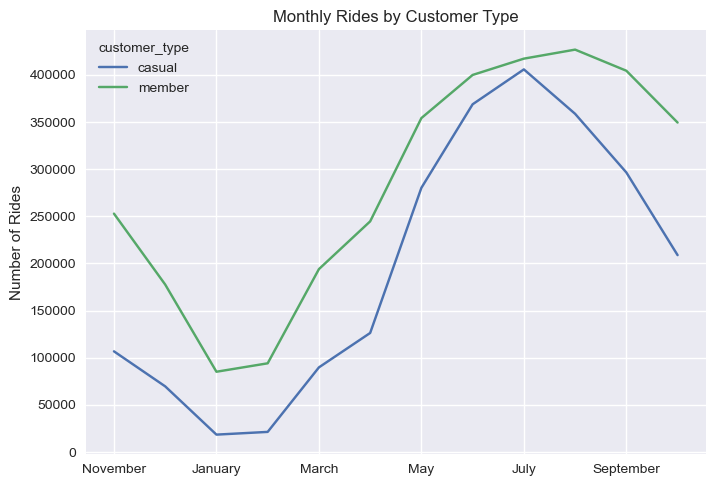

In [38]:
customers_per_m.plot(title="Monthly Rides by Customer Type", ylabel="Number of Rides", xlabel="")
plt.show()

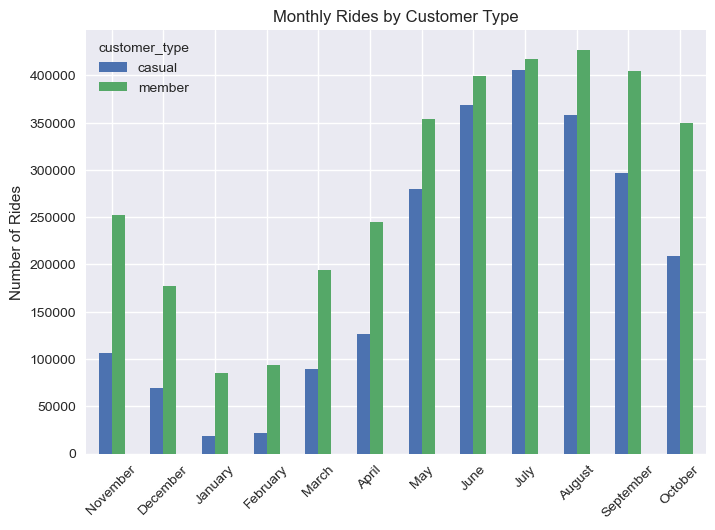

In [39]:
customers_per_m.plot(kind="bar", title="Monthly Rides by Customer Type", ylabel="Number of Rides", xlabel="", rot=45)
plt.show()

Winter is the slowest time of year.<br>
Summer is our best season.<br>
We saw a significant increase in rides from April to May, for both annual members and casual riders.<br>
June and July is the only months where annual members ride difference over casual riders is less than 50,000.

In [40]:
# Calculate the average 'ride_length' per 'day_of_week' by 'customer_type'
avg_monthly_ride_length = trip_data.groupby(["customer_type", "month_of_year"])["ride_length"].agg("mean").unstack().T

# Sort the index
avg_monthly_ride_length = avg_monthly_ride_length.reindex(months)
avg_monthly_ride_length

customer_type,casual,member
month_of_year,,
November,23.139783,11.310303
December,23.503448,11.006561
January,30.39668,11.982202
February,26.630513,11.405889
March,32.608613,11.956576
April,29.544768,11.493529
May,30.873087,13.366882
June,32.107584,13.999559
July,29.283882,13.720783


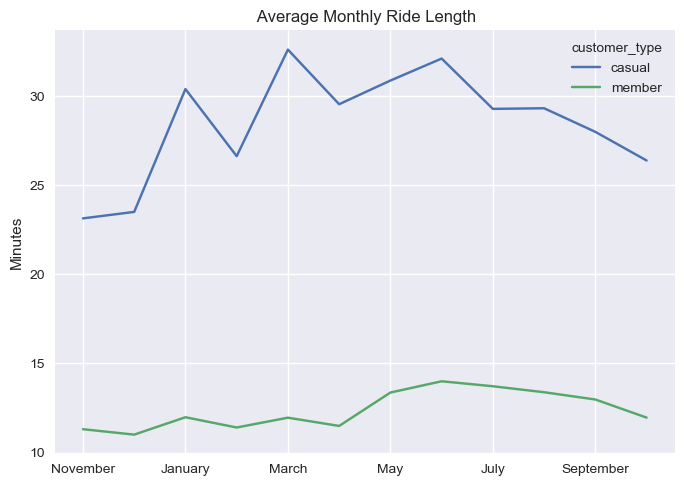

In [41]:
avg_monthly_ride_length.plot(title=" Average Monthly Ride Length", ylabel="Minutes", xlabel="")
plt.show()

Members, on average, ride longer during the summer months.<br>
Casual riders, on average, ride longer in January and March thru June.<br>

## Visualize Ride Length Outliers

### By day of the week

<Figure size 2400x1200 with 0 Axes>

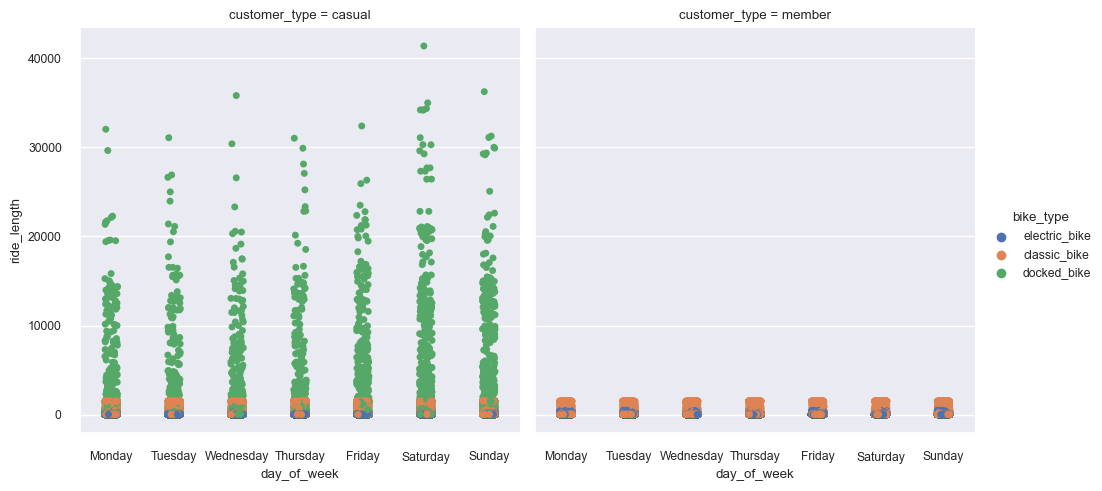

In [48]:
plt.figure(figsize=(24,12))
sns.set(font_scale=.8)
sns.catplot(data=trip_data, x="day_of_week", y ="ride_length",
            col="customer_type", hue="bike_type", order=weekdays)
plt.show()

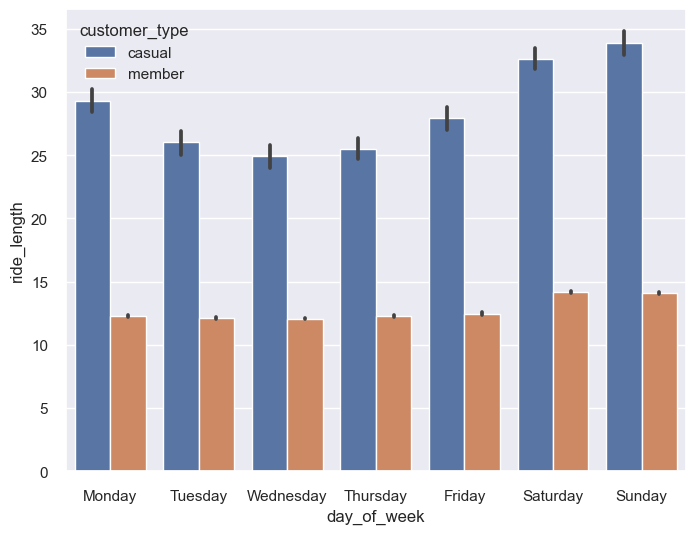

In [43]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1)
sns.barplot(data=trip_data, x="day_of_week", y ="ride_length",
            hue="customer_type", dodge=True, order=weekdays)
plt.show()

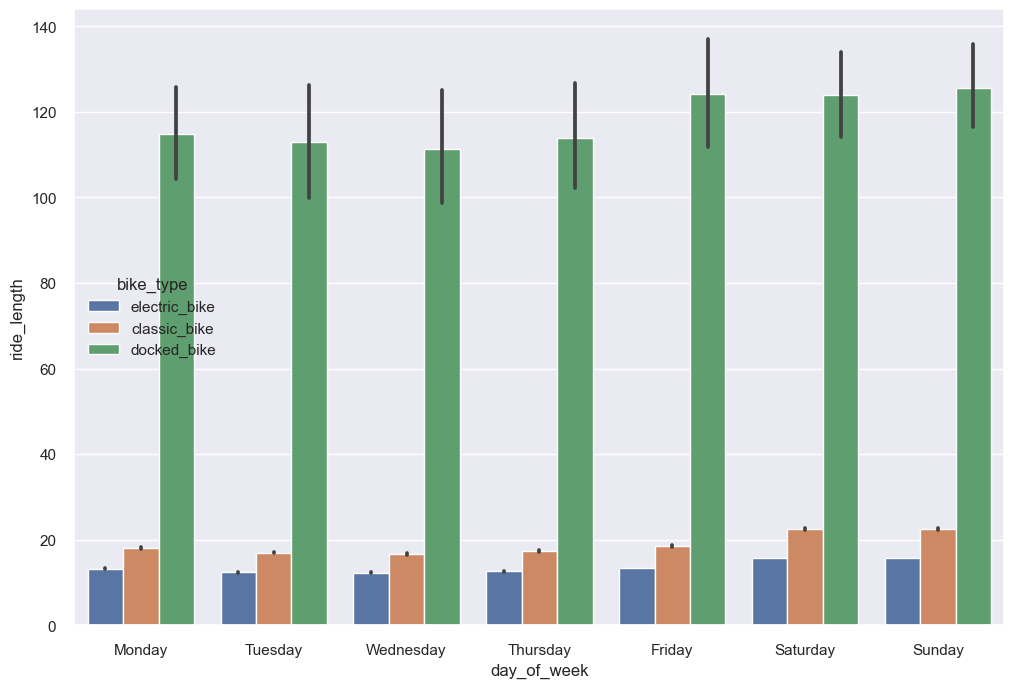

In [44]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1)
sns.barplot(data=trip_data, x="day_of_week", y ="ride_length",
            hue="bike_type", dodge=True, order=weekdays)
plt.show()

#### Ride Length outliers seem to arise from the docked bike trips<br>
<i>May remove these records and reanalyze</i>

### By month of the year

<Figure size 2400x1200 with 0 Axes>

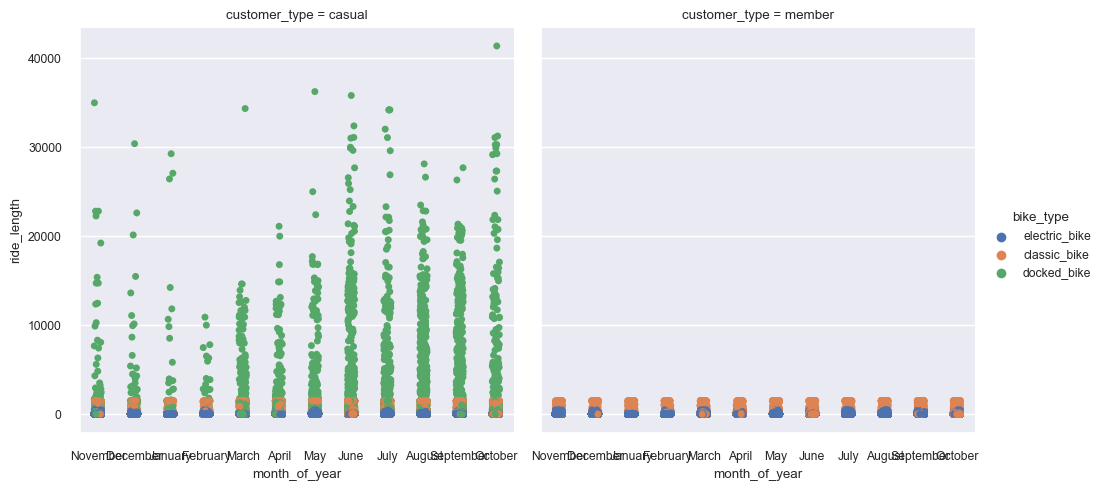

In [50]:
plt.figure(figsize=(24,12))
sns.set(font_scale=.8)
sns.catplot(data=trip_data, x="month_of_year", y ="ride_length",
            col="customer_type", hue="bike_type", order=months)
plt.show()

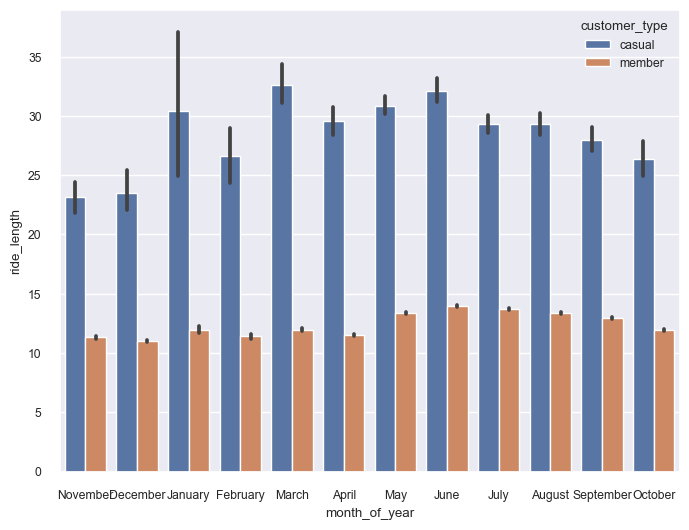

In [46]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=.8)
sns.barplot(data=trip_data, x="month_of_year", y ="ride_length",
            hue="customer_type", dodge=True, order=months)
plt.show()

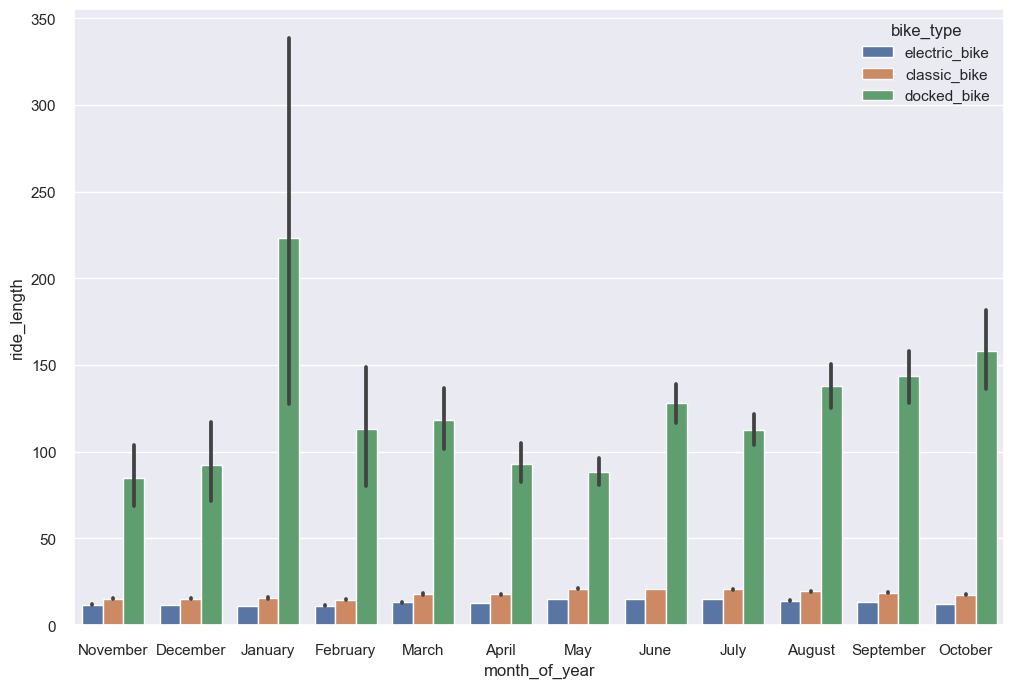

In [47]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1)
sns.barplot(data=trip_data, x="month_of_year", y ="ride_length",
            hue="bike_type", dodge=True, order=months)
plt.show()

Any marketing campaign should begin in April, no later than May. Summer, as expected, is the busiest time of year.  Sales<br>
improve beginning in May and extending through September, October for members, for casual riders.